## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [5]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [6]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [7]:
df['Sex'].unique()

array([0, 1])

In [8]:
df['Rank'].unique()

array([3, 2, 1])

In [9]:
df['Year'].unique()

array([25, 13, 10,  7, 19, 16,  0, 12, 15,  9, 11,  6,  8,  5,  3,  4,  1,
        2])

In [10]:
df['Degree'].unique()

array([1, 0])

In [11]:
df['YSdeg'].unique()

array([35, 22, 23, 27, 30, 21, 32, 18, 31, 19, 17, 24, 15, 20, 14, 13, 12,
       16,  7, 33, 29,  9,  4,  5, 11,  3,  1,  6,  2])

# EDA

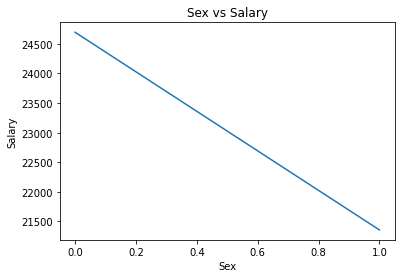

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [12]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

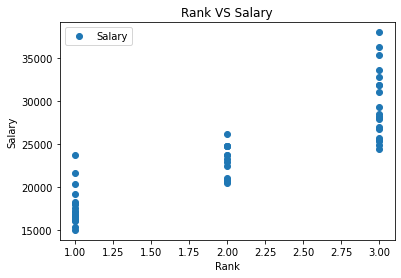

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [13]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank VS Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

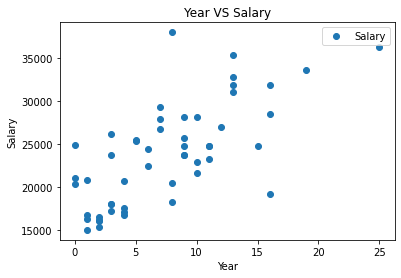

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [14]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year VS Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

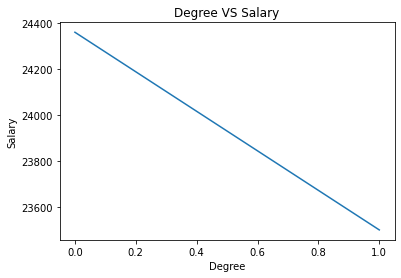

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [15]:
data=df.groupby('Degree')['Salary'].mean()
data.plot()
plt.title('Degree VS Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

# There is No Correlation Between Degree and Salary.So,Transforming the feature.

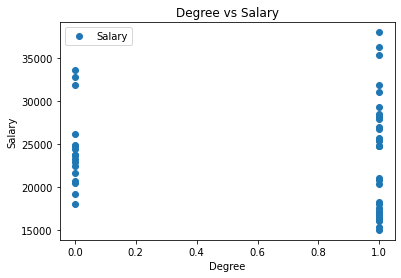

,trans_sqrt,Salary
trans_sqrt,1.000000,-0.069726
Salary,-0.069726,1.000000


In [16]:
df['trans_sqrt'] = np.square(df['Degree'])#transofrming
df.plot(x='trans_sqrt', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['trans_sqrt','Salary']].corr()

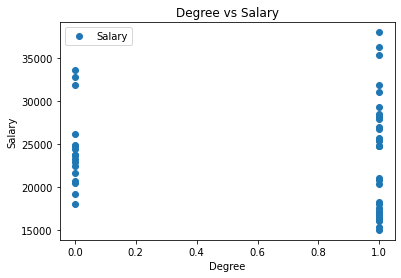

,trans_power,Salary
trans_power,1.000000,-0.069726
Salary,-0.069726,1.000000


In [17]:
df['trans_power'] = np.power(df['Degree'],3)#transofrming
df.plot(x='trans_power', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['trans_power','Salary']].corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


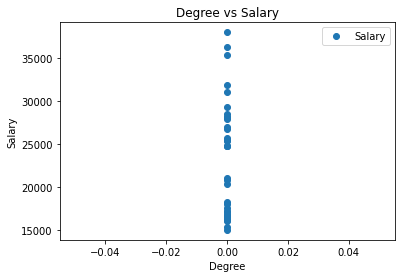

,trans_log,Salary
trans_log,NaN,NaN
Salary,NaN,1.0


In [18]:
df['trans_log'] = np.log(df['Degree'])#transofrming
df.plot(x='trans_log', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['trans_log','Salary']].corr()

# There is No Correlation Between Degree and Salary.So,Didnot able to use this as Feature.

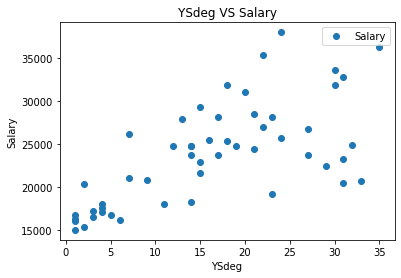

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [19]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg VS Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

In [20]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary', 'trans_sqrt',
       'trans_power', 'trans_log'],
      dtype='object')

# Splitting

In [21]:
X = df[['Sex', 'Rank', 'Year','Degree','YSdeg']].values 
y = df['Salary'].values 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Model Fitting

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

# **1. Find the linear regression equation for this data using columns 1-5 to column 6.** 

In [25]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year','Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
y_pred

array([26452.88227547, 27194.9528203 , 26710.94976114, 15794.81507954,
       17443.87774909, 17607.97892069, 22886.56619453, 22002.02238718,
       19595.51478631, 28734.74495   , 24666.59747372, 23536.72637606,
       23646.39491481, 30364.48606346, 32293.24412774, 16535.32224372])

In [26]:
coeff_df

,Coefficient
Sex,777.375597
Rank,4789.924607
Year,3246.323208
Degree,-946.752796
YSdeg,-1545.012149


# **2. Find the selection of columns with the best $R^2$ score.**

In [27]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7404824109053909


# **3. Report whether sex is a factor in salary.**

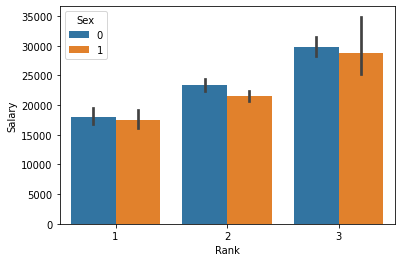

In [28]:
import seaborn as sns
sns.barplot(x=df['Rank'],y=df['Salary'],hue=df['Sex'])

# We can also see that the On the basis of their rank the Average Salary a Male Professor earns is not much different from what a Female Professor receives.

In [29]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


# Sex and Salary has Negative Correlation.So,Sex no Affinity to Salary.